In [ ]:
#O presente estudo busca realizar uma análise exploratória de um banco de dados que contém informações de suicídios ocorridos no Brasil entre os anos 2014 e 2018
#O estudo limita-se a analisar apenas o ano de 2018 e realizar um comparativo final das ocorrências com os outros anos

In [1]:
#Importando todas as bibliotecas que serão utilizadas durante a análise
import pandas as pd
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
from datetime import datetime

In [47]:
#Carregando o banco de dados na variável 'df_geral'
df_geral = pd.read_csv("datasus_suicidio_2014_2018.csv", sep = ",", encoding = 'latin-1')
df_geral

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [3]:
#Criando a base de 2018
df_2018 = df_geral.loc[df_geral['ano'] == 2018]

In [4]:
#Filtrando apenas ocorrências de suicídio para nossa base
df_2018_suicidios = df_2018.loc[df_2018['CIRCOBITO'] == 'Suicídio']
df_2018_suicidios

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
45870,AC,2018,Suicídio,06-11-18,13-02-94,Masculino,Indígena,Solteiro,Nenhuma,TRABALHADOR VOLANTE DA AGRICULTURA,Manoel Urbano,Via pública,Não,X700,X700,24.0,11
45871,AC,2018,Suicídio,02-01-18,17-06-97,Masculino,Parda,União consensual,8 a 11 anos,DESEMPREGADO CRONICO,Feijó,Domicílio,NaN,X709,X70,21.0,1
45872,AC,2018,Suicídio,15-01-18,14-01-90,Masculino,Parda,União consensual,4 a 7 anos,0,Marechal Thaumaturgo,Domicílio,NaN,X700,X700,28.0,1
45873,AC,2018,Suicídio,17-03-18,07-01-82,Masculino,Parda,União consensual,NaN,TRABALHADOR VOLANTE DA AGRICULTURA,Marechal Thaumaturgo,Domicílio,NaN,X700,X700,36.0,3
45874,AC,2018,Suicídio,27-03-18,05-07-76,Feminino,Parda,União consensual,12 e mais,0,Marechal Thaumaturgo,Domicílio,Não,X700,X700,42.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [5]:
#Iniciamos o tratamento da nossa base. Analisamos se temos colunas com valores nulos
#Observamos que temos grande volume de nulos nas colunas RACACOR, ESTCIV, ESC e ASSISTMED
df_2018_suicidios.isnull().sum()

estado           0
ano              0
CIRCOBITO        0
DTOBITO          0
DTNASC          44
SEXO             4
RACACOR        175
ESTCIV         917
ESC           2673
OCUP             0
CODMUNRES        0
LOCOCOR         25
ASSISTMED     3207
CAUSABAS         0
CAUSABAS_O      12
idade           44
mes              0
dtype: int64

In [6]:
#Para tratarmos os valores nulos da coluna RACACOR, utilizaremos o valor de moda para replace
sts.mode(df_2018_suicidios['RACACOR'])

'Branca'

In [7]:
#Realizaremos o mesmo para as colunas restantes
sts.mode(df_2018_suicidios['ESTCIV'])

'Solteiro'

In [8]:
sts.mode(df_2018_suicidios['ESC'])

'8 a 11 anos'

In [9]:
sts.mode(df_2018_suicidios['ASSISTMED'])

'Não'

In [10]:
#Substituimos pelos valores de moda que encontramos para cada coluna
df_2018_suicidios['RACACOR'].fillna('Branca', inplace = True)
df_2018_suicidios['ESTCIV'].fillna('Solteiro', inplace = True)
df_2018_suicidios['ESC'].fillna('8 a 11 anos', inplace = True)
df_2018_suicidios['ASSISTMED'].fillna('Não', inplace = True)
df_2018_suicidios.loc[df_2018_suicidios['OCUP'] == 0, 'OCUP'] = 'Estudante'


C:\Users\User\AppData\Local\Temp\ipykernel_1144\3094180206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_suicidios['RACACOR'].fillna('Branca', inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_1144\3094180206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_suicidios['ESTCIV'].fillna('Solteiro', inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_1144\3094180206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [11]:
#Para o restante das colunas com valores nulos com menor volume, iremos dropar
df_2018_suicidios.dropna(inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_1144\828447404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_suicidios.dropna(inplace = True)


In [12]:
#Realizamos o check para verificar se ainda existe valores nulos
df_2018_suicidios.isnull().sum()

estado        0
ano           0
CIRCOBITO     0
DTOBITO       0
DTNASC        0
SEXO          0
RACACOR       0
ESTCIV        0
ESC           0
OCUP          0
CODMUNRES     0
LOCOCOR       0
ASSISTMED     0
CAUSABAS      0
CAUSABAS_O    0
idade         0
mes           0
dtype: int64

In [13]:
#Contagem de ocorrências de suícidios em 2018
num_ocorrencias = df_2018_suicidios['CIRCOBITO'].count()
print("No ano de 2018,", num_ocorrencias, "casos de suicídio foram registrados.")



No ano de 2018 12171 casos de suicídio foram registrados.


Text(0, 0.5, 'Estados')

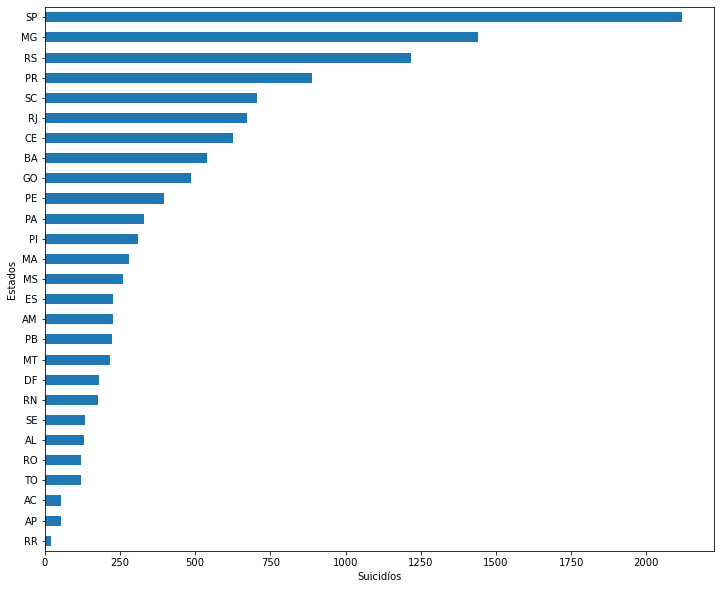

In [14]:
#Gráfico de ocorrências por Estado
suicidios_por_estado = df_2018_suicidios.groupby('estado')['CIRCOBITO'].size().sort_values(ascending = True)
plt.figure(figsize = ((12, 10)))
suicidios_por_estado.plot.barh("estado", width = 0.5, linewidth = 9.5)
plt.xlabel('Suicidíos')
plt.ylabel('Estados')

Text(0, 0.5, 'Sexo')

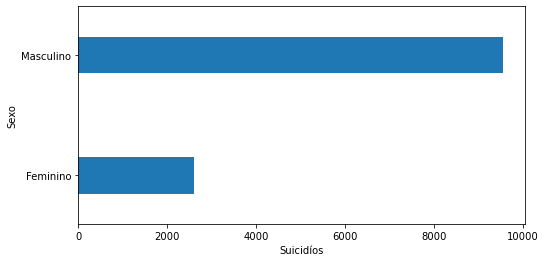

In [15]:
#Ocorrências por sexo
plt.figure(figsize = ((8, 4)))
suicidios_por_sexo = df_2018_suicidios.groupby('SEXO')['CIRCOBITO'].size().sort_values(ascending = True)
suicidios_por_sexo.plot.barh("sexo", width = 0.3, linewidth = 5)
plt.xlabel('Suicidíos')
plt.ylabel('Sexo')

Text(0, 0.5, 'População em milhões de habitantes')

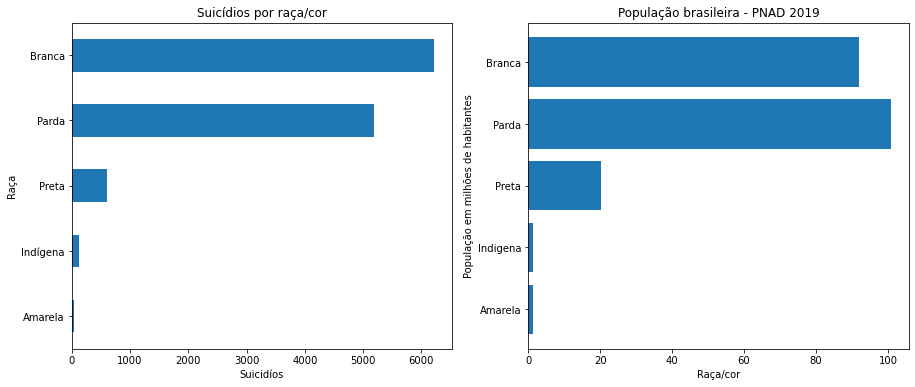

In [60]:
#Ocorrências por raça/cor e gráfico da população do Brasil, segundo PNAD 2019
suicidios_por_raca = df_2018_suicidios.groupby('RACACOR')['CIRCOBITO'].size().sort_values(ascending = True)
plt.figure(figsize = ((15, 6)))
plt.subplot(1, 2, 1)
suicidios_por_raca.plot.barh("sexo", width = 0.5, linewidth = 7)
plt.title('Suicídios por raça/cor')
plt.xlabel('Suicidíos')
plt.ylabel('Raça')
plt.subplot(1, 2, 2)
pop_branca = 91885671/1000000
pop_parda = 100708417/1000000
pop_preta = 20227759/1000000
pop_indigena = 1183539/1000000
pop_amarela = 1183539/1000000
racas = ['Amarela', 'Indigena', 'Preta', 'Parda', 'Branca']
populacao = [pop_amarela, pop_indigena, pop_preta, pop_parda, pop_branca]
plt.barh(racas, populacao)
plt.title("População brasileira - PNAD 2019")
plt.xlabel('Raça/cor')
plt.ylabel('População em milhões de habitantes')

Text(0, 0.5, 'Estado Civil')

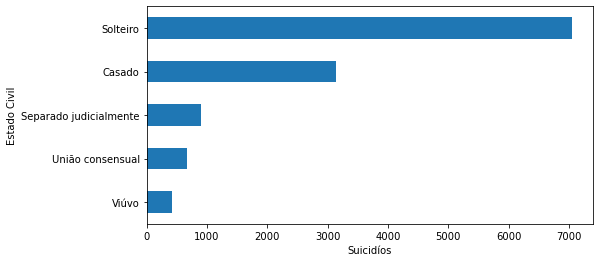

In [17]:
#Ocorrências por estado civil
suicidios_por_estado_civil = df_2018_suicidios.groupby('ESTCIV')['CIRCOBITO'].size().sort_values(ascending = True)
plt.figure(figsize = ((8, 4)))
suicidios_por_estado_civil.plot.barh("sexo", width = 0.5, linewidth = 7)
plt.xlabel('Suicidíos')
plt.ylabel('Estado Civil')

Text(0, 0.5, 'Escolaridade')

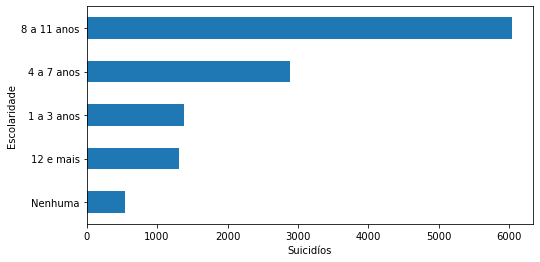

In [18]:
#Ocorrências por grau de escolaridade
suicidios_por_escolaridade = df_2018_suicidios.groupby('ESC')['CIRCOBITO'].size().sort_values(ascending = True)
plt.figure(figsize = ((8, 4)))
suicidios_por_escolaridade.plot.barh("sexo", width = 0.5, linewidth = 7)
plt.xlabel('Suicidíos')
plt.ylabel('Escolaridade')

Text(0, 0.5, 'Ocupação')

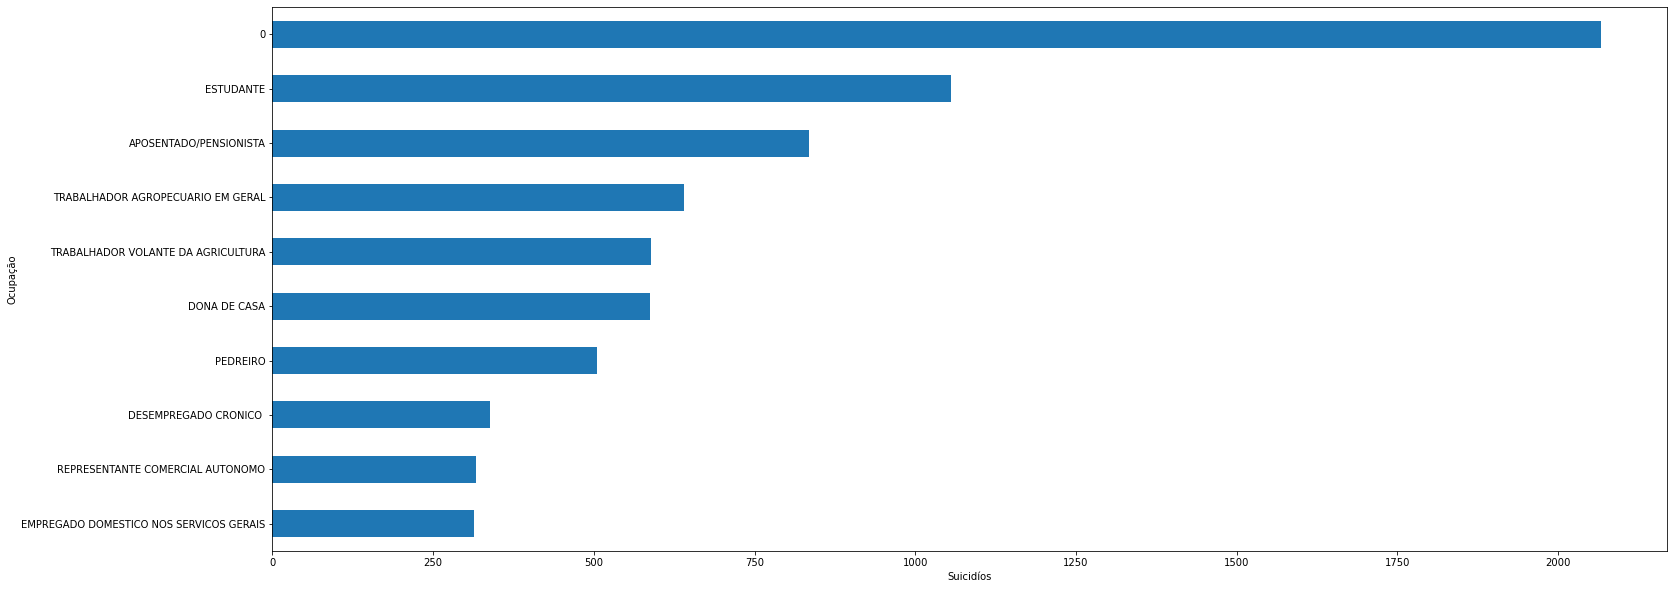

In [19]:
#Ocorrências por ocupação, o valor 0 não foi substituido e nem dropado por não ser um valor nulo. O estudo seria afetado caso realizasse a substituição pelo valor de moda, estudante.
suicidios_por_ocupacao = df_2018_suicidios.groupby('OCUP')['CIRCOBITO'].size().sort_values(ascending = True).tail(10)
plt.figure(figsize = ((25, 10)))
suicidios_por_ocupacao.plot.barh("sexo", width = 0.5, linewidth = 7)
plt.xlabel('Suicidíos')
plt.ylabel('Ocupação')

Text(0, 0.5, 'Municipios')

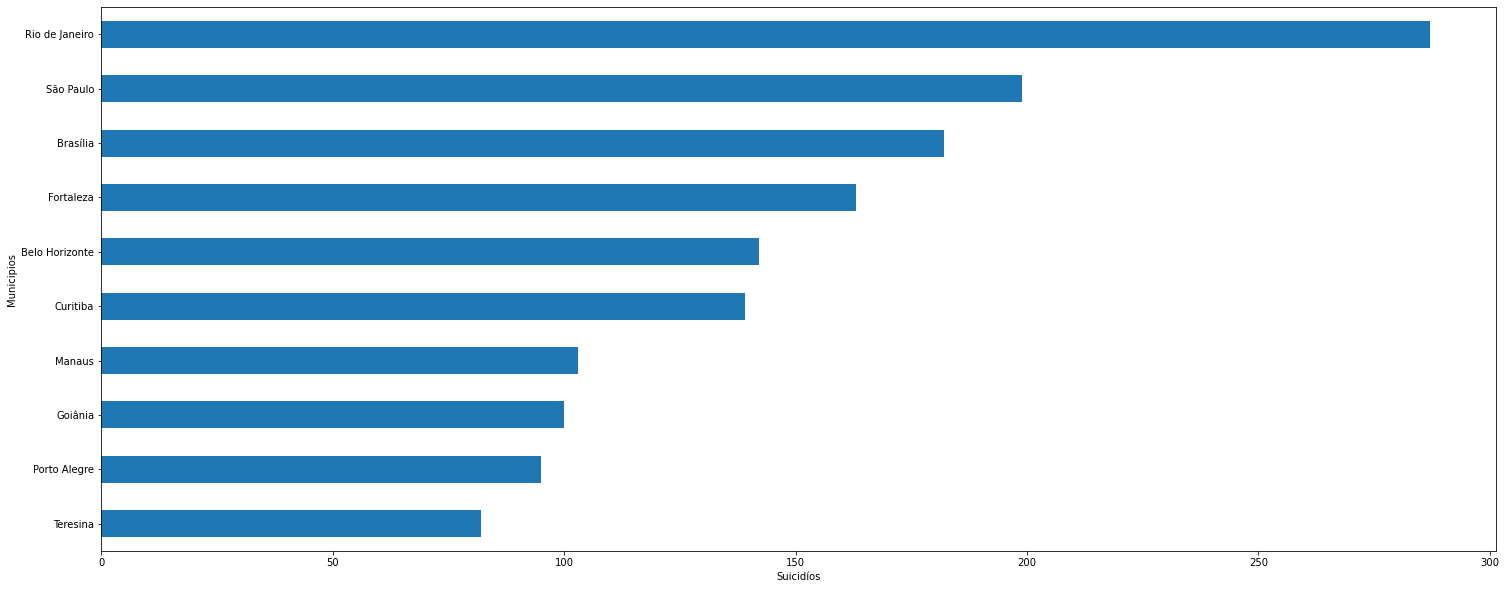

In [20]:
#Ocorrências por cidade
suicidios_por_municipio = df_2018_suicidios.groupby('CODMUNRES')['CIRCOBITO'].size().sort_values(ascending = True).tail(10)
plt.figure(figsize = ((25, 10)))
suicidios_por_municipio.plot.barh("sexo", width = 0.5, linewidth = 7)
plt.xlabel('Suicidíos')
plt.ylabel('Municipios')

Text(0, 0.5, 'Local de ocorrência')

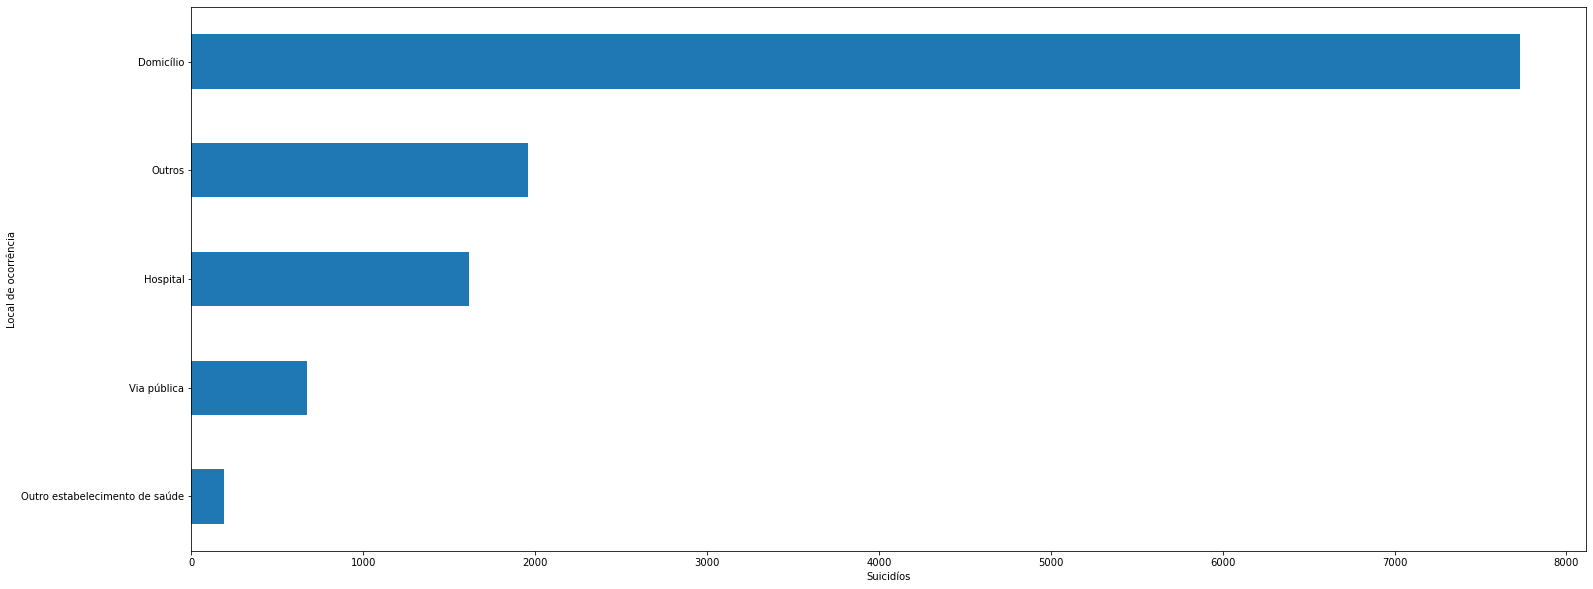

In [21]:
#Ocorrências por local do evento
suicidios_por_local = df_2018_suicidios.groupby('LOCOCOR')['CIRCOBITO'].size().sort_values(ascending = True)
plt.figure(figsize = ((25, 10)))
suicidios_por_local.plot.barh("sexo", width = 0.5, linewidth = 7)
plt.xlabel('Suicidíos')
plt.ylabel('Local de ocorrência')

Text(0, 0.5, 'Plano de saúde')

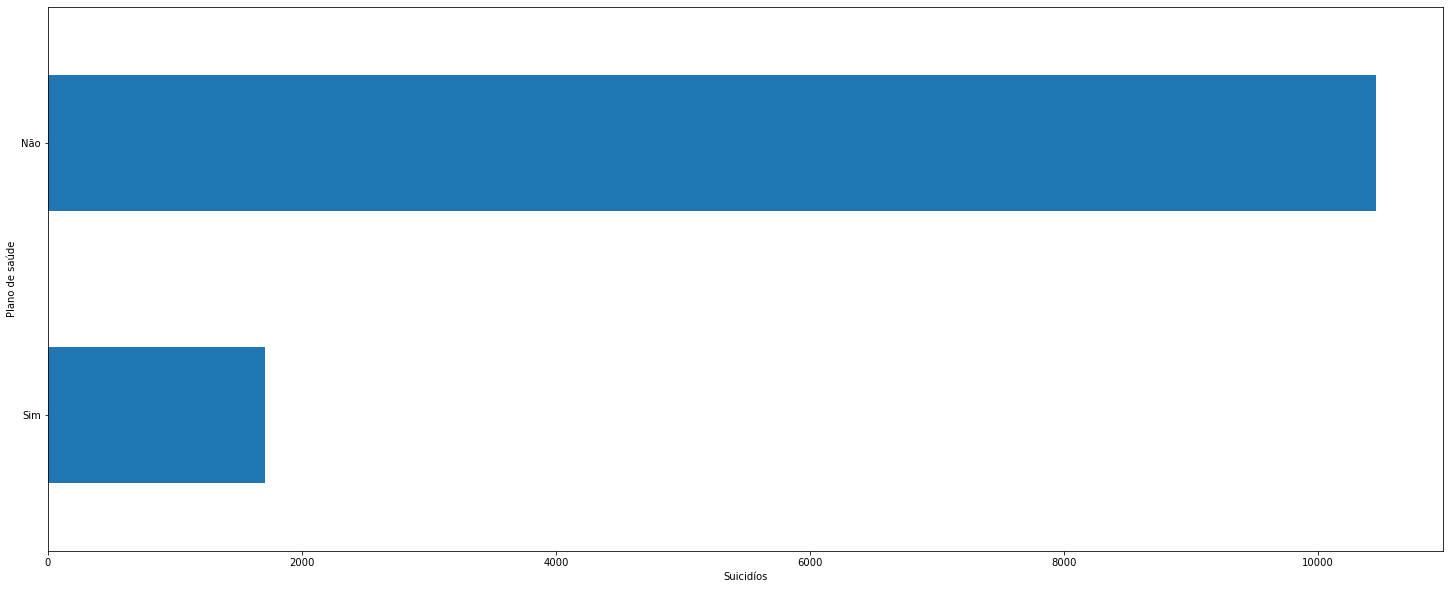

In [22]:
#Ocorrências por classificação de assistência médica
suicidios_por_plano_de_saude = df_2018_suicidios.groupby('ASSISTMED')['CIRCOBITO'].size().sort_values(ascending = True)
plt.figure(figsize = ((25, 10)))
suicidios_por_plano_de_saude.plot.barh("sexo", width = 0.5, linewidth = 7)
plt.xlabel('Suicidíos')
plt.ylabel('Plano de saúde')

In [23]:
#Resumo estatístico da coluna de idade
df_2018_suicidios['idade'].describe()

count    12171.000000
mean        42.616055
std         17.515953
min          8.000000
25%         29.000000
50%         41.000000
75%         55.000000
max        103.000000
Name: idade, dtype: float64

In [24]:
#Analisando a cidade Rio de Janeiro
rio_de_janeiro_suicidios = df_2018_suicidios.loc[df_2018_suicidios['CODMUNRES'] == 'Rio de Janeiro']
rio_de_janeiro_suicidios

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
53129,RJ,2018,Suicídio,23-02-18,23-04-83,Masculino,Branca,Solteiro,8 a 11 anos,"RECEPCIONISTA, EM GERAL",Rio de Janeiro,Outros,Não,X709,X709,35.0,2
53130,RJ,2018,Suicídio,14-01-18,02-01-96,Masculino,Branca,Solteiro,12 e mais,ESTUDANTE,Rio de Janeiro,Domicílio,Não,X700,Y200,22.0,1
53133,RJ,2018,Suicídio,04-01-18,06-03-94,Feminino,Branca,Solteiro,12 e mais,VENDEDOR DE COMERCIO VAREJISTA,Rio de Janeiro,Outros,Não,X748,X748,24.0,1
53134,RJ,2018,Suicídio,07-01-18,30-10-66,Masculino,Parda,Solteiro,1 a 3 anos,PEDREIRO,Rio de Janeiro,Domicílio,Não,X780,Y340,52.0,1
53135,RJ,2018,Suicídio,08-01-18,17-09-72,Masculino,Branca,Solteiro,8 a 11 anos,VENDEDOR EM COMERCIO ATACADISTA,Rio de Janeiro,Outros,Não,X708,Y208,46.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53786,RJ,2018,Suicídio,28-12-18,22-04-95,Masculino,Branca,Solteiro,12 e mais,ESTUDANTE,Rio de Janeiro,Domicílio,Não,X849,R99,23.0,12
53787,RJ,2018,Suicídio,31-12-18,21-10-99,Masculino,Branca,Solteiro,8 a 11 anos,0,Rio de Janeiro,Domicílio,Não,X700,Y200,19.0,12
53806,RJ,2018,Suicídio,15-12-18,13-02-36,Feminino,Branca,Casado,4 a 7 anos,DONA DE CASA,Rio de Janeiro,Hospital,Sim,X749,X749,82.0,12
53809,RJ,2018,Suicídio,22-11-18,09-02-65,Masculino,Branca,Solteiro,8 a 11 anos,0,Rio de Janeiro,Outros,Não,X849,R99,53.0,11


In [25]:
#Agrupamento por sexo
rio_de_janeiro_suicidios.groupby('SEXO')['CIRCOBITO'].size().sort_values(ascending = False)

SEXO
Masculino    193
Feminino      94
Name: CIRCOBITO, dtype: int64

In [26]:
#Agrupamento por raça
rio_de_janeiro_suicidios.groupby('RACACOR')['CIRCOBITO'].size().sort_values(ascending = False)

RACACOR
Branca     167
Parda       94
Preta       25
Amarela      1
Name: CIRCOBITO, dtype: int64

In [27]:
#Agrupamento por estado civil
rio_de_janeiro_suicidios.groupby('ESTCIV')['CIRCOBITO'].size().sort_values(ascending = False)

ESTCIV
Solteiro                  183
Casado                     64
Separado judicialmente     29
Viúvo                      10
União consensual            1
Name: CIRCOBITO, dtype: int64

In [28]:
#Agrupamento por ocupação
rio_de_janeiro_suicidios.groupby('OCUP')['CIRCOBITO'].size().sort_values(ascending = False).head(6)

OCUP
0                                  62
ESTUDANTE                          23
DONA DE CASA                       18
PEDREIRO                            9
VENDEDOR EM COMERCIO ATACADISTA     8
ADVOGADO                            7
Name: CIRCOBITO, dtype: int64

In [29]:
#Agrupamento por assistência médica
rio_de_janeiro_suicidios.groupby('ASSISTMED')['CIRCOBITO'].size().sort_values(ascending = False).head(6)

ASSISTMED
Não    271
Sim     16
Name: CIRCOBITO, dtype: int64

In [34]:
#Criação de todas as variáveis de ocorrência para cada ano (2014 até 2018)
ocorr_2014 = df_geral.loc[df_geral['ano'] == 2014]
ocorr_2015 = df_geral.loc[df_geral['ano'] == 2015]
ocorr_2016 = df_geral.loc[df_geral['ano'] == 2016]
ocorr_2017 = df_geral.loc[df_geral['ano'] == 2017]
ocorr_2018 = df_geral.loc[df_geral['ano'] == 2018]

suicidios_2014 = ocorr_2014.loc[ocorr_2014['CIRCOBITO'] == 'Suicídio']
suicidios_2015 = ocorr_2015.loc[ocorr_2015['CIRCOBITO'] == 'Suicídio']
suicidios_2016 = ocorr_2016.loc[ocorr_2016['CIRCOBITO'] == 'Suicídio']
suicidios_2017 = ocorr_2017.loc[ocorr_2017['CIRCOBITO'] == 'Suicídio']
suicidios_2018 = ocorr_2018.loc[ocorr_2018['CIRCOBITO'] == 'Suicídio']



In [42]:
#Criação de todas as variáveis de ocorrência para cada ano (2014 até 2018)
num_2014 = suicidios_2014.CIRCOBITO.count()
num_2015 = suicidios_2015.CIRCOBITO.count()
num_2016 = suicidios_2016.CIRCOBITO.count()
num_2017 = suicidios_2017.CIRCOBITO.count()
num_2018 = suicidios_2018.CIRCOBITO.count()
anos = ['2014', '2015', '2016', '2017', '2018']
ocorrencias_comparativo = [num_2014, num_2015, num_2016, num_2017, num_2018]

Text(0.5, 1.0, 'Casos de suicídio no Brasil ao longo dos anos')

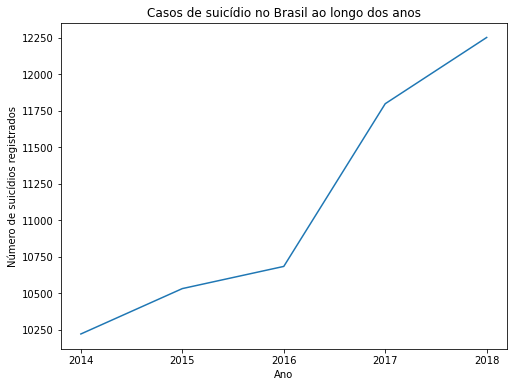

In [46]:
#Gráfico comparativo entre os anos 2014 até 2018
plt.figure(figsize = ((8, 6)))
plt.plot(anos, ocorrencias_comparativo)
plt.xlabel('Ano')
plt.ylabel('Número de suicídios registrados')
plt.title('Casos de suicídio no Brasil ao longo dos anos')
